In [ ]:
pip install opencv-python

In [ ]:
# folder strcture

# /TB_Chest_Radiography_Database
#      /normal (3500)
#      /TB (2450)

# cv2

In [ ]:
import numpy as np
import cv2
import os

## motion blur

In [ ]:
def motion_bluring(file_pathname,labels,degree,angle):
    for classes in ["Normal","Tuberculosis"]:
        #new_path = file_pathname+"_"+labels+'_degree'+str(degree)+'_angle'+str(angle)+'/'+classes
        new_path = labels+'_degree'+str(degree)+'_angle'+str(angle)+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = cv2.imread(file_pathname+'/'+classes+'/'+filename)
            processed_img = motion_blur(orig_img,degree=degree, angle=angle)
            #####save figure
            cv2.imwrite(new_path+"/"+filename, processed_img, [int(cv2.IMWRITE_PNG_COMPRESSION), 3])        

for degree in [3,6,9,12,15,18]:
    motion_bluring("./TB_Chest_Radiography_Database","cv2_motionblur",degree=degree,angle=0)
    
for angle in [0,60,120,180,240,300]:
    motion_bluring("./TB_Chest_Radiography_Database","cv2_motionblur",degree=5,angle=angle)

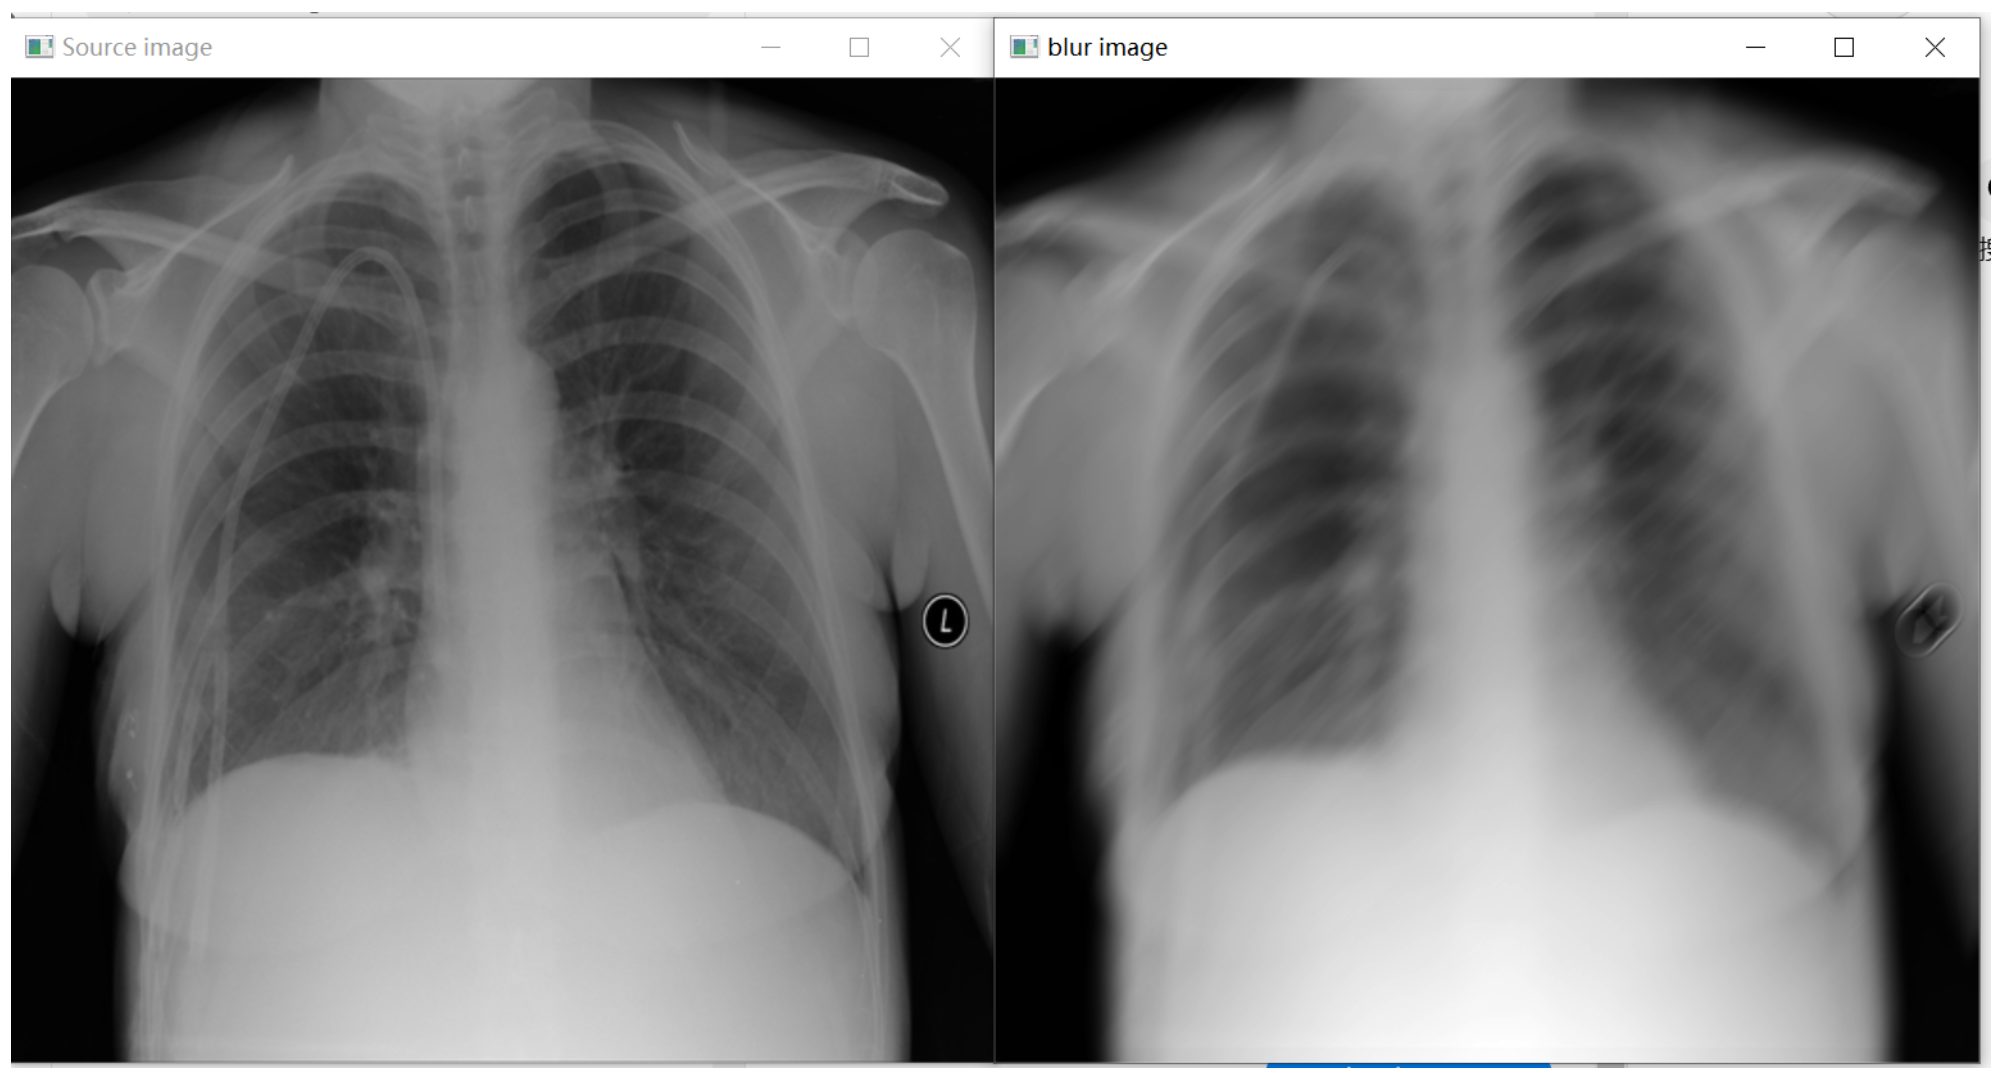

## back scatter

In [ ]:
def double_image(mask,file_pathname,labels,weight=0.03):
    for classes in ["Normal","Tuberculosis"]:
        #new_path = file_pathname+"_"+labels+'_weight'+str(weight)+'/'+classes
        new_path = labels+'_weight'+str(weight)+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = cv2.imread(file_pathname+'/'+classes+'/'+filename)
            processed_img = cv2.addWeighted(orig_img,1,mask_resize,weight,0)
            #####save figure
            cv2.imwrite(new_path+"/"+filename, processed_img, [int(cv2.IMWRITE_PNG_COMPRESSION), 3])        

mask = cv2.imread('TB_Chest_Radiography_Database/backscatter.jpg')
mask_resize = cv2.resize(mask, (512, 512))

for w in [0.005,0.01,0.02,0.03,0.04,0.05]:
    double_image(mask,"./TB_Chest_Radiography_Database","cv2_backscatter",weight=w)

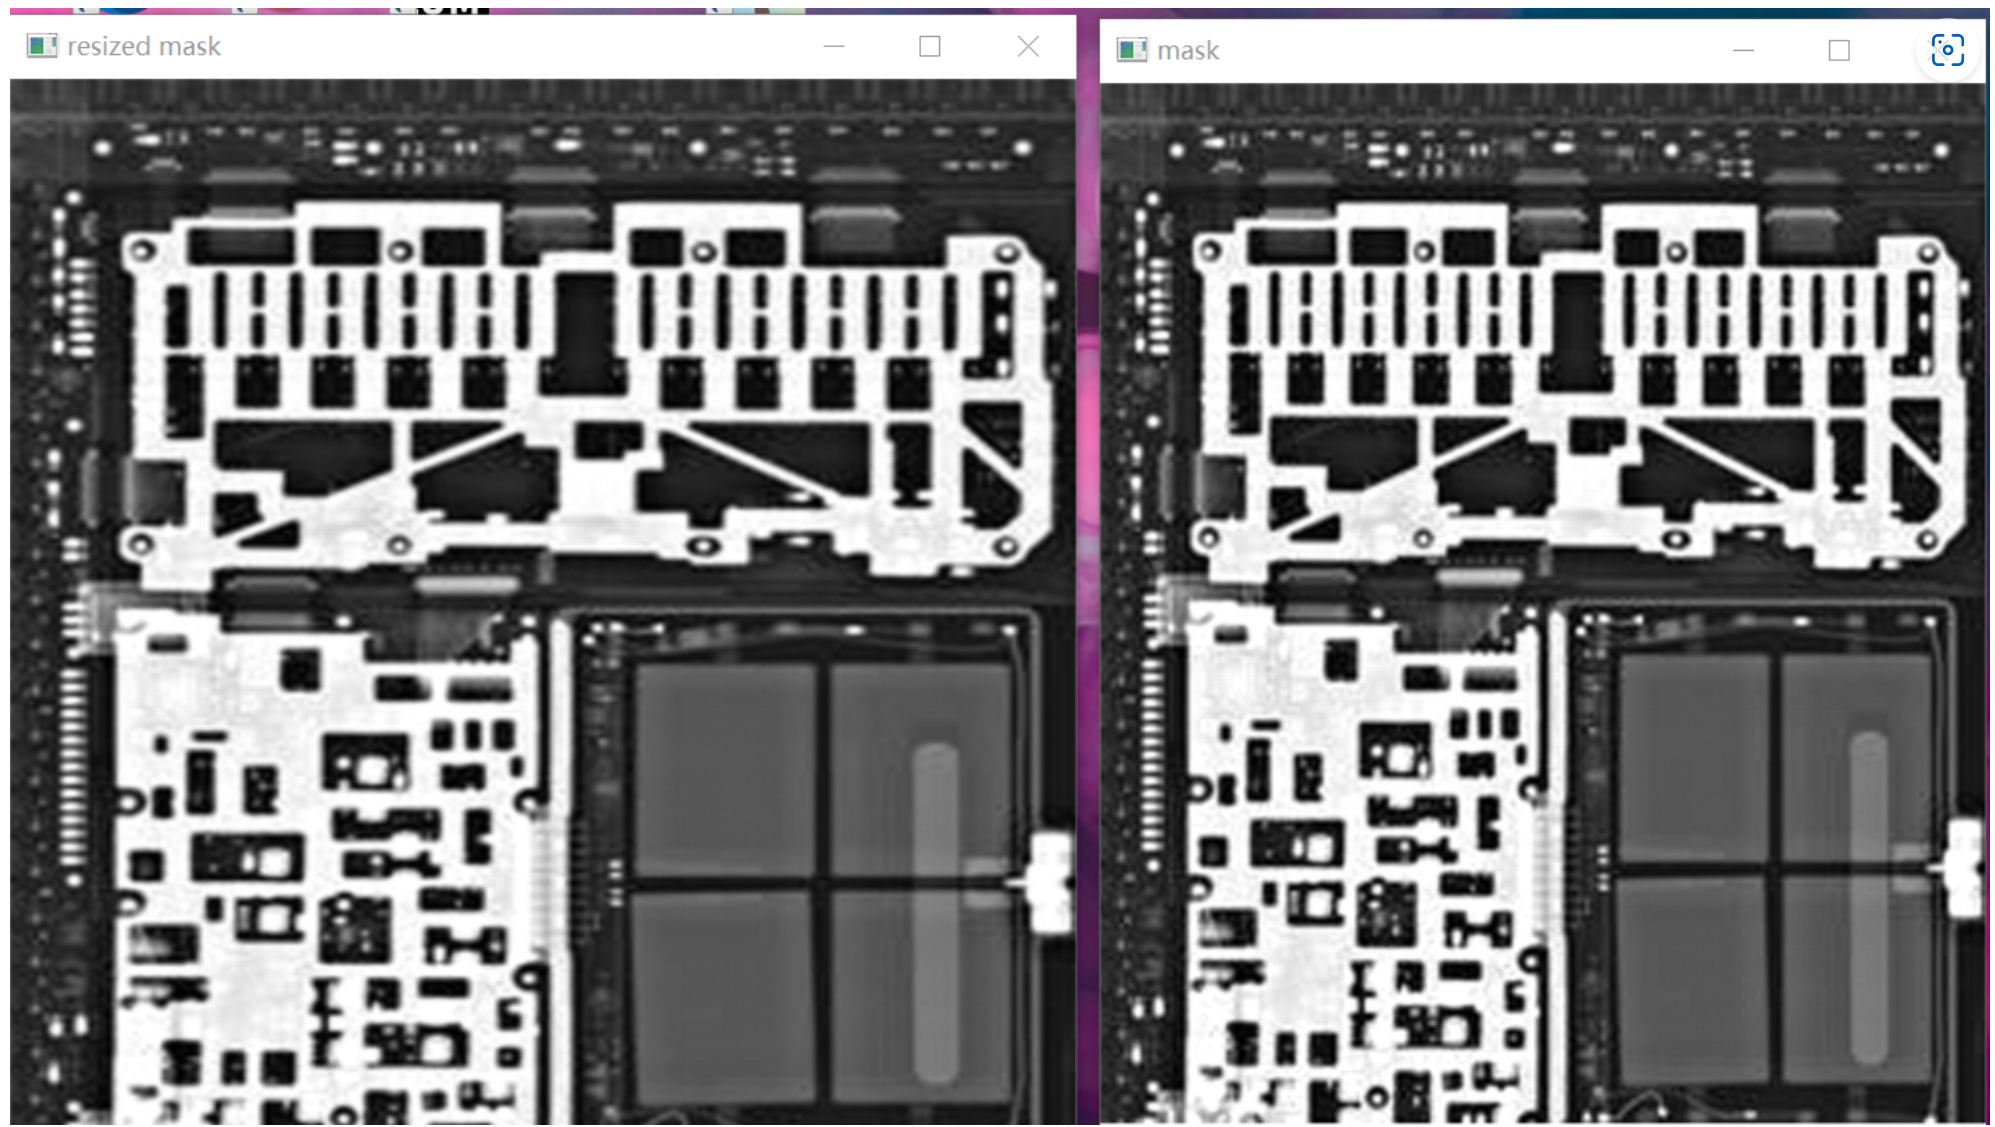

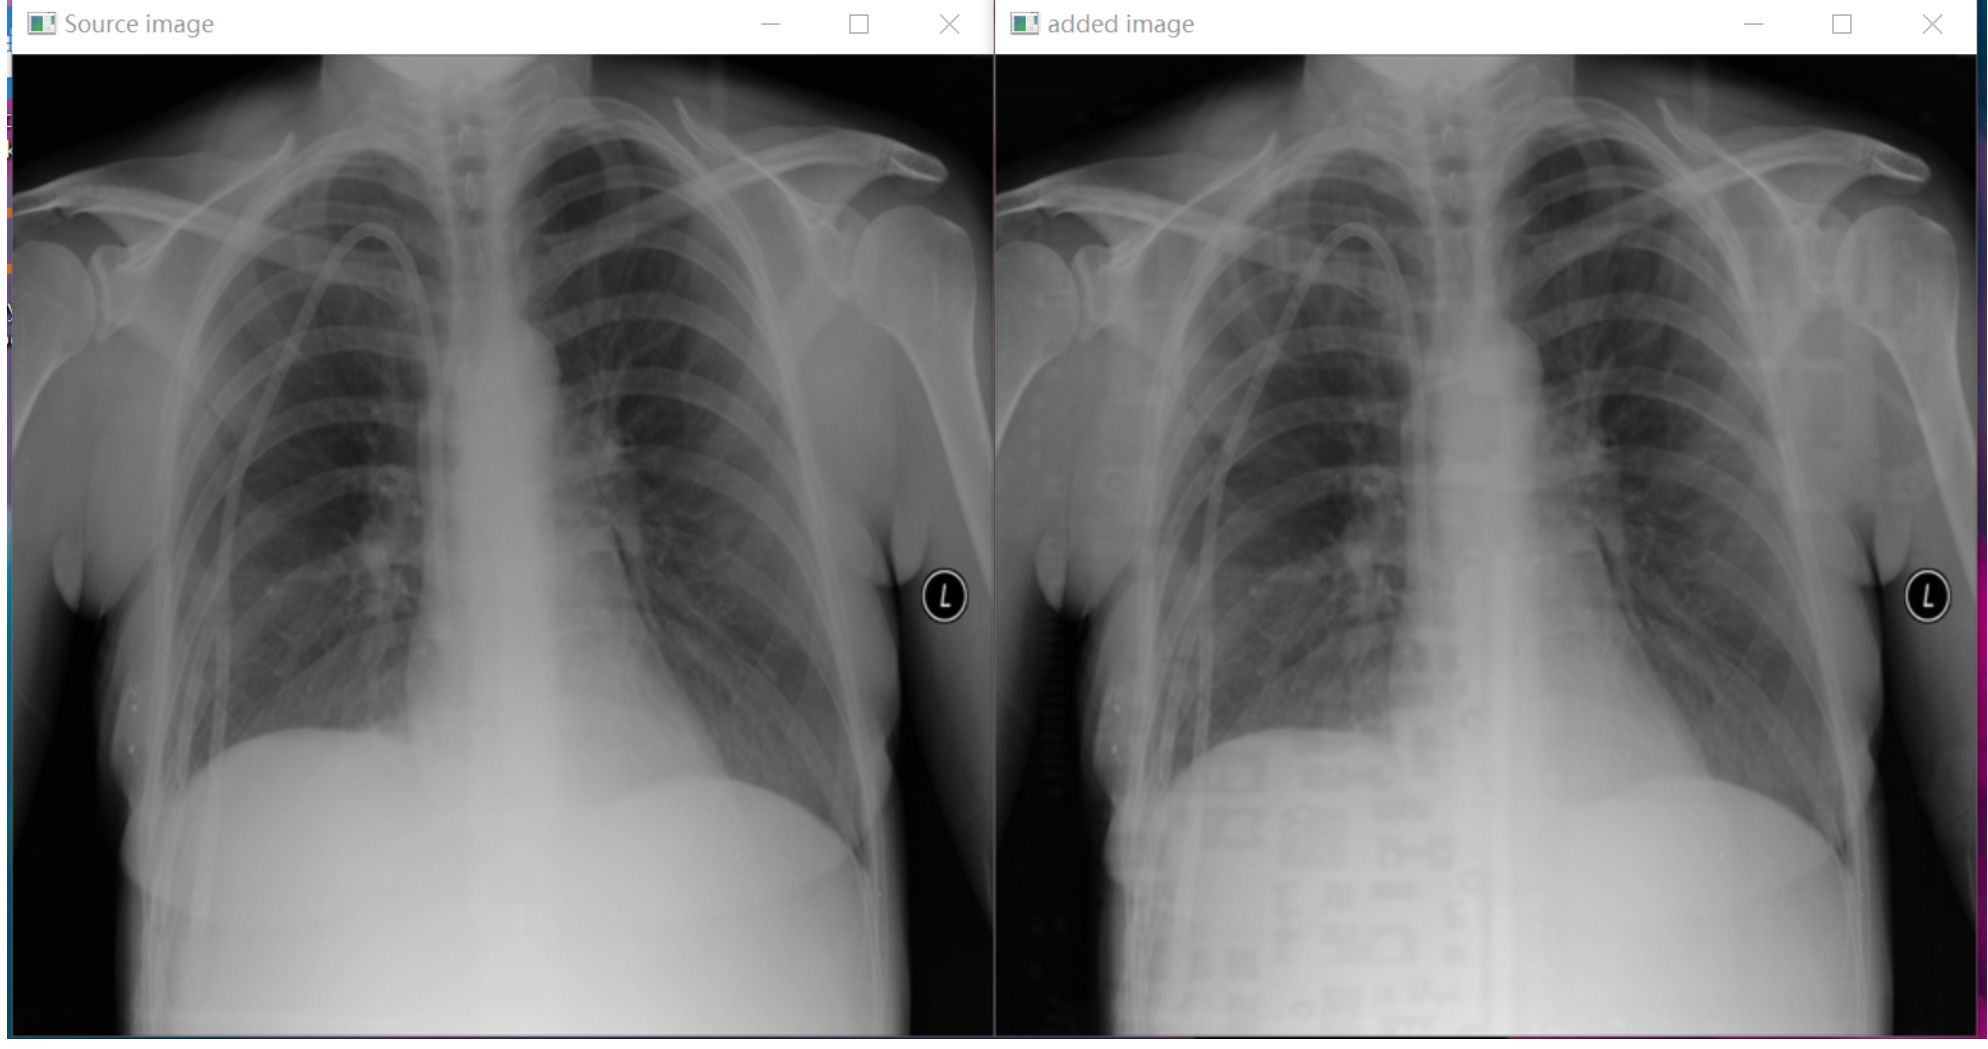

# torch transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader
import random 
from tqdm import tqdm 
import warnings
import sys

import os
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

## color jitter (['brightness','contrast','saturation','hue'])

In [ ]:
def colorjittering_brightness(file_pathname,labels,value):
    if labels == 'brightness':
        Color_transformer = T.ColorJitter(brightness=value)
    if labels == 'contrast':
        Color_transformer = T.ColorJitter(contrast=value)
    if labels == 'saturation':
        Color_transformer = T.ColorJitter(contrast=value)
    if labels == 'hue':
        a = np.array(value)
        b = a/2-0.5
        c = np.round(b,2)
        d = c.tolist()
        Color_transformer = T.ColorJitter(hue=d)
        value = d
        
    for classes in ["Normal","Tuberculosis"]:
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)
            colored_img = Color_transformer(orig_img)
            #####save figure
            #new_path = file_pathname+"_"+labels+str(value)+'/'+classes
            new_path = labels+str(value)+'/'+classes
            folder = os.path.exists(new_path)
            if not folder:
                os.makedirs(new_path)
            colored_img.save(new_path+"/"+filename)       

for labels in ['brightness','contrast','saturation','hue']:
    for value in [[0.5,0.65],[0.65,0.8],[0.8,0.95],[1.05,1.2],[1.2,1.35],[1.35,1.5]]:
        colorjittering_brightness("./TB_Chest_Radiography_Database",labels,value)

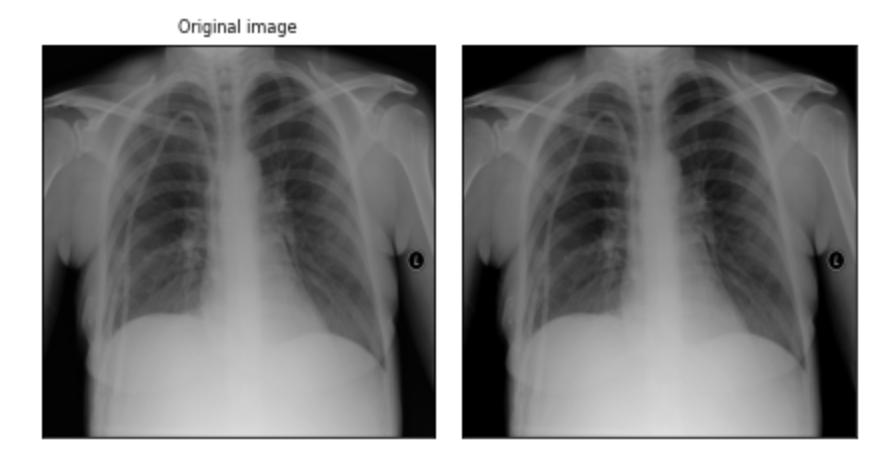

## gaussion blur ([kernelsize,sigma])

In [ ]:
def gaussian_bluring(file_pathname,labels,kernelsize):
    sigma = 0.3*((kernelsize-1)*0.5-1)+0.8
    for classes in ["Normal","Tuberculosis"]:
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)

            transformers = T.GaussianBlur(kernel_size=kernelsize, sigma=sigma)
            processed_img = transformers(orig_img)
            #####save figure
            #new_path = file_pathname+"_"+labels+'_kernel'+str(kernelsize)+'_sigma'+str(sigma)+'/'+classes
            new_path = labels+'_kernel'+str(kernelsize)+'_sigma'+str(sigma)+'/'+classes
            folder = os.path.exists(new_path)
            if not folder:
                os.makedirs(new_path)
            processed_img.save(new_path+"/"+filename)       

for b in [3,5,7,9,11,13,15]:
    gaussian_bluring("./TB_Chest_Radiography_Database","gaussianblur",b)

In [ ]:
def gaussian_bluring_sigma(file_pathname,labels,kernelsize,sigma):
    for classes in ["Normal","Tuberculosis"]:
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)

            transformers = T.GaussianBlur(kernel_size=kernelsize, sigma=sigma)
            processed_img = transformers(orig_img)
            #####save figure
            #new_path = file_pathname+"_"+labels+'_kernel'+str(kernelsize)+'_sigma'+str(sigma)+'/'+classes
            new_path = labels+'_kernel'+str(kernelsize)+'_sigma'+str(sigma)+'/'+classes
            folder = os.path.exists(new_path)
            if not folder:
                os.makedirs(new_path)
            processed_img.save(new_path+"/"+filename)

for s in [0.3,0.6,0.9,1.2,1.5,1.8]:
    gaussian_bluring_sigma("./TB_Chest_Radiography_Database","gaussianblur",5,s)

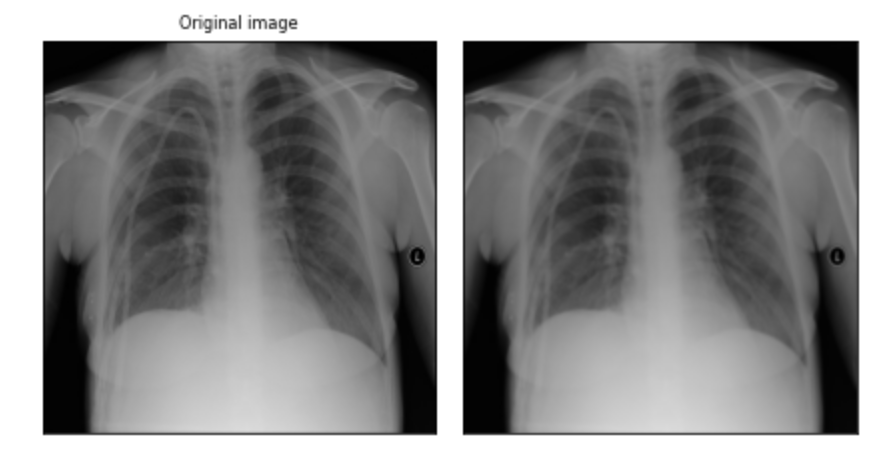

## perspective change

In [ ]:
def RandomPerspective(file_pathname,labels,scale):
    for classes in ["Normal","Tuberculosis"]:
        #new_path = file_pathname+"_"+labels+'_scale'+str(scale)+'/'+classes
        new_path = labels+'_scale'+str(scale)+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)
            transformers = T.RandomPerspective(distortion_scale=scale, p=1.0)
            processed_img = transformers(orig_img)
            #####save figure
            processed_img.save(new_path+"/"+filename)       

for scale in [0.1,0.2,0.3,0.4,0.5,0.6]:
    RandomPerspective("./TB_Chest_Radiography_Database","RandomPerspective",scale)

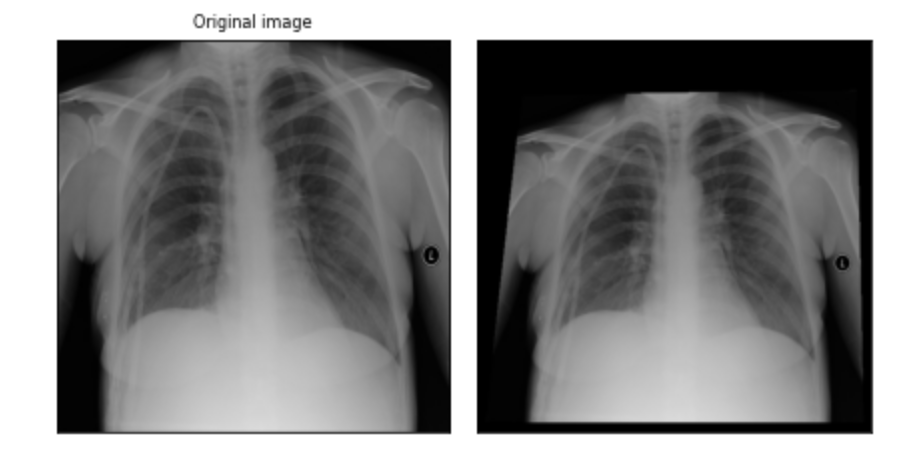

## rotation

In [ ]:
def rotating(file_pathname,labels,degree):
    for classes in ["Normal","Tuberculosis"]:
        #new_path = file_pathname+"_"+labels+'_degrees'+str(degree)+'/'+classes
        new_path = labels+'_degrees'+str(degree)+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)
            transformers = T.RandomRotation(degrees=degree)
            processed_img = transformers(orig_img)
            #####save figure
            processed_img.save(new_path+"/"+filename)       
for degree in [10,20,40,60,80,100]:
    rotating("./TB_Chest_Radiography_Database","rotation",degree)

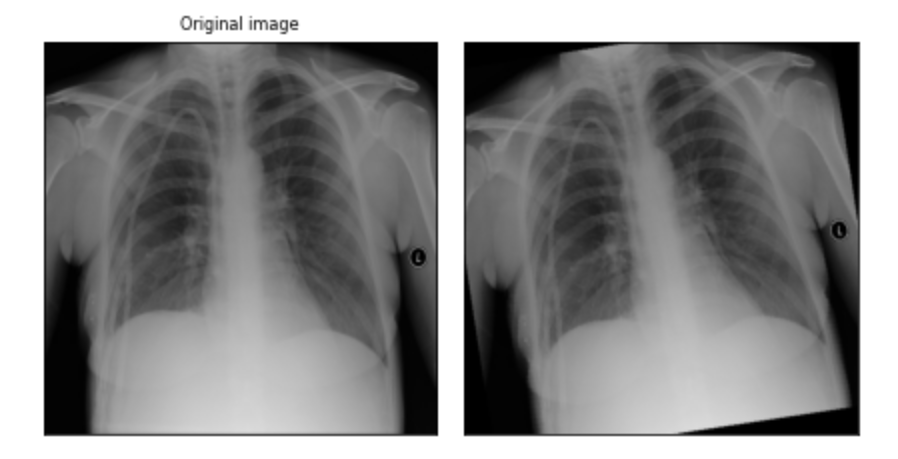

# PIL

## adding box

In [ ]:
def add_random_boxes(img,n_k,size=64):
    h,w = size,size
    img = np.asarray(img).copy()
    img_size = img.shape[1]
    boxes = []
    for k in range(n_k):
        y,x = np.random.randint(0,img_size-w,(2,))
        img[y:y+h,x:x+w] = 255 
        #255 for white, 0 for black 
        boxes.append((x,y,h,w))
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    return img

def adding_box(file_pathname,labels):
    for classes in ["Normal","Tuberculosis"]:
        new_path = file_pathname+"_"+labels+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)
            processed_img = add_random_boxes(orig_img,n_k=5)
            #####save figure
            processed_img.save(new_path+"/"+filename)       

adding_box("./TB_Chest_Radiography_Database","adding_box_5")

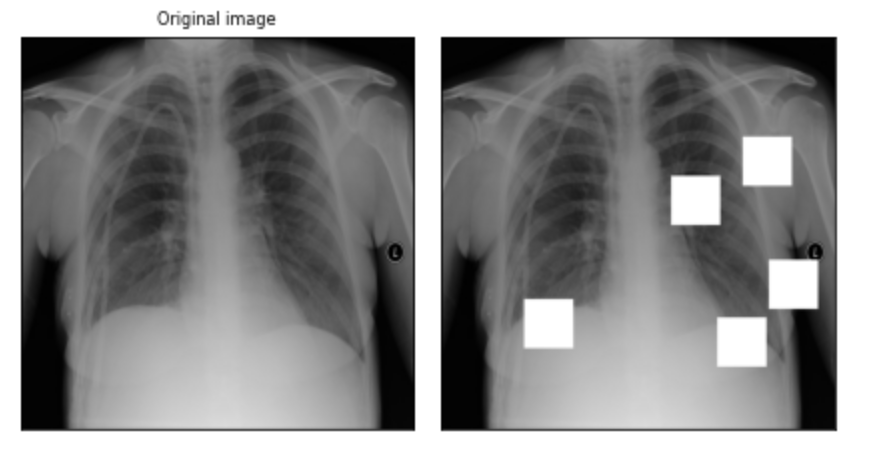

## adding box (none center coverage)

In [ ]:
def add_random_boxes_nocenter(img,n_k,size=64):
    h,w = size,size
    img = np.asarray(img).copy()
    img_size = img.shape[1]
    boxes = []
    limit = img_size/4-size
    for k in range(n_k):
        y,x = np.random.randint(0,2*limit,(2,1),dtype=np.uint8)
        x = 0.75*img_size*(x//limit)+x%limit
        y = 0.75*img_size*(y//limit)+y%limit
        x = int(x)
        y = int(y)
        img[y:y+h,x:x+w] = 255
        boxes.append((x,y,h,w))
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    return img

def adding_box_nocenter(file_pathname,labels,num,size=64):
    for classes in ["Normal","Tuberculosis"]:
        #new_path = file_pathname+"_"+labels+'_num'+str(num)+'_size'+str(size)+'/'+classes
        new_path = labels+'_num'+str(num)+'_size'+str(size)+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename).convert('RGB')
            processed_img = add_random_boxes_nocenter(orig_img,num,size)
            #####save figure
            processed_img.save(new_path+"/"+filename)       

for num in [1,2,3,4,5,6]:
    adding_box_nocenter("./TB_Chest_Radiography_Database","adding_white_box",num)

for size in [20,40,60,80,100,120]:
    adding_box_nocenter("./TB_Chest_Radiography_Database","adding_white_box",4,size)

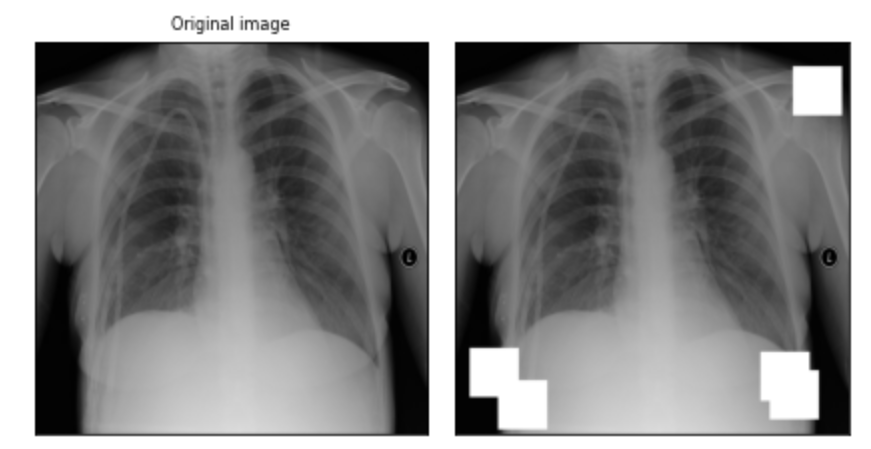

## adding artifacts(mask)

In [ ]:
# artifacts png files folder

# /artifacts
#     /chest (5)
#     /jew (5)
#     /neck (5)

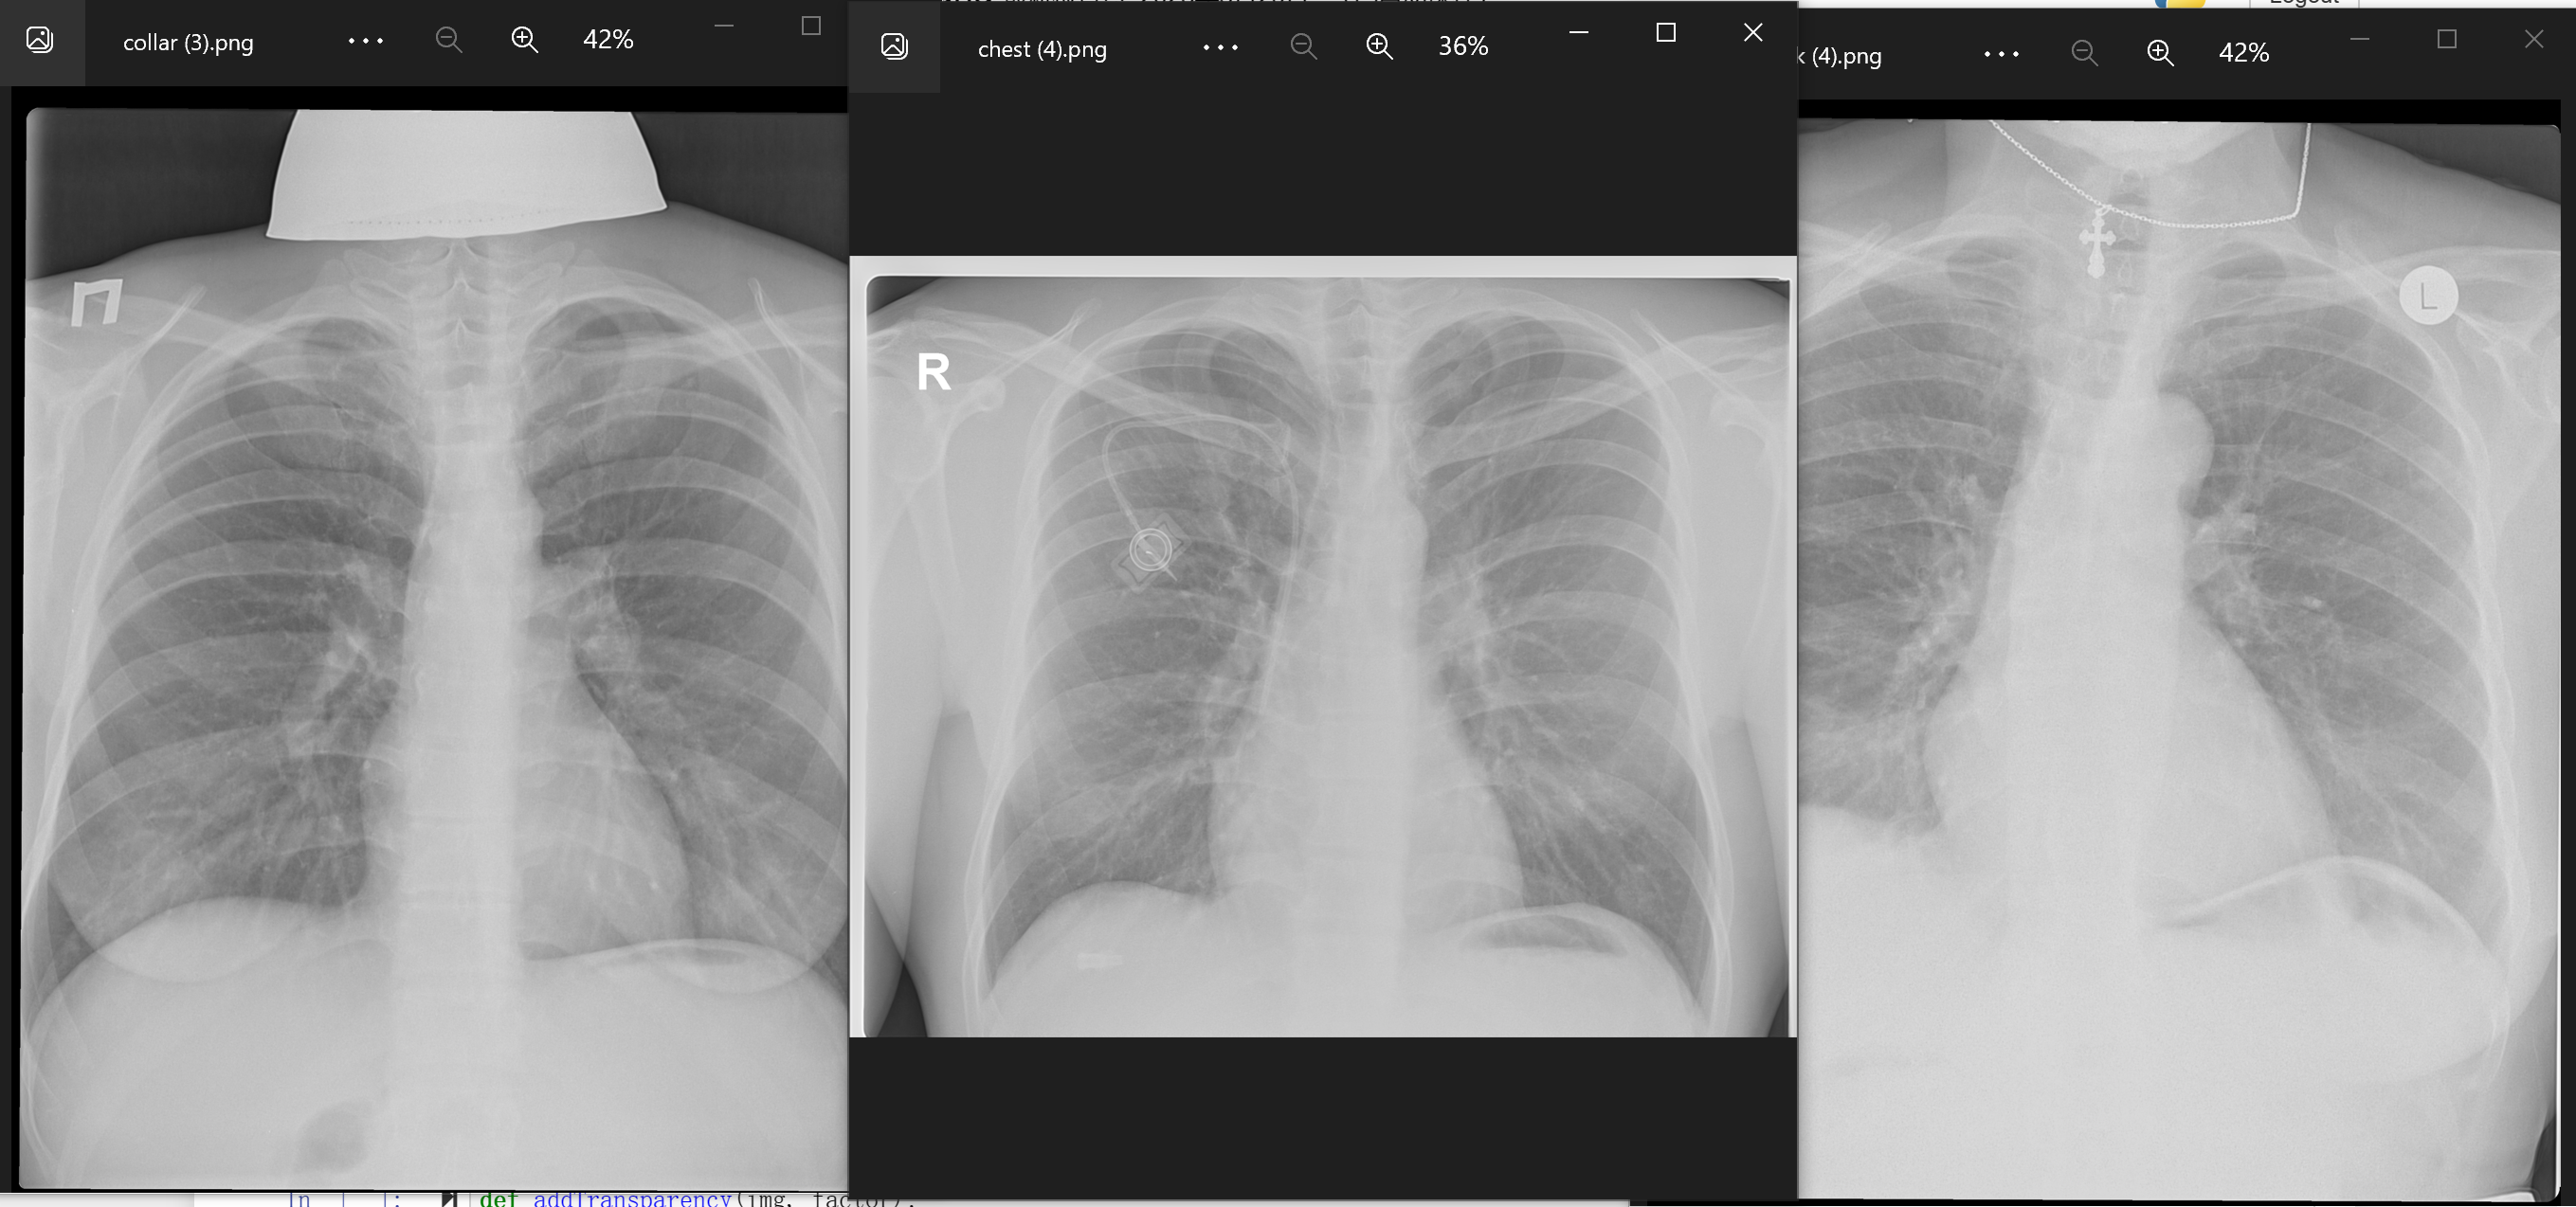

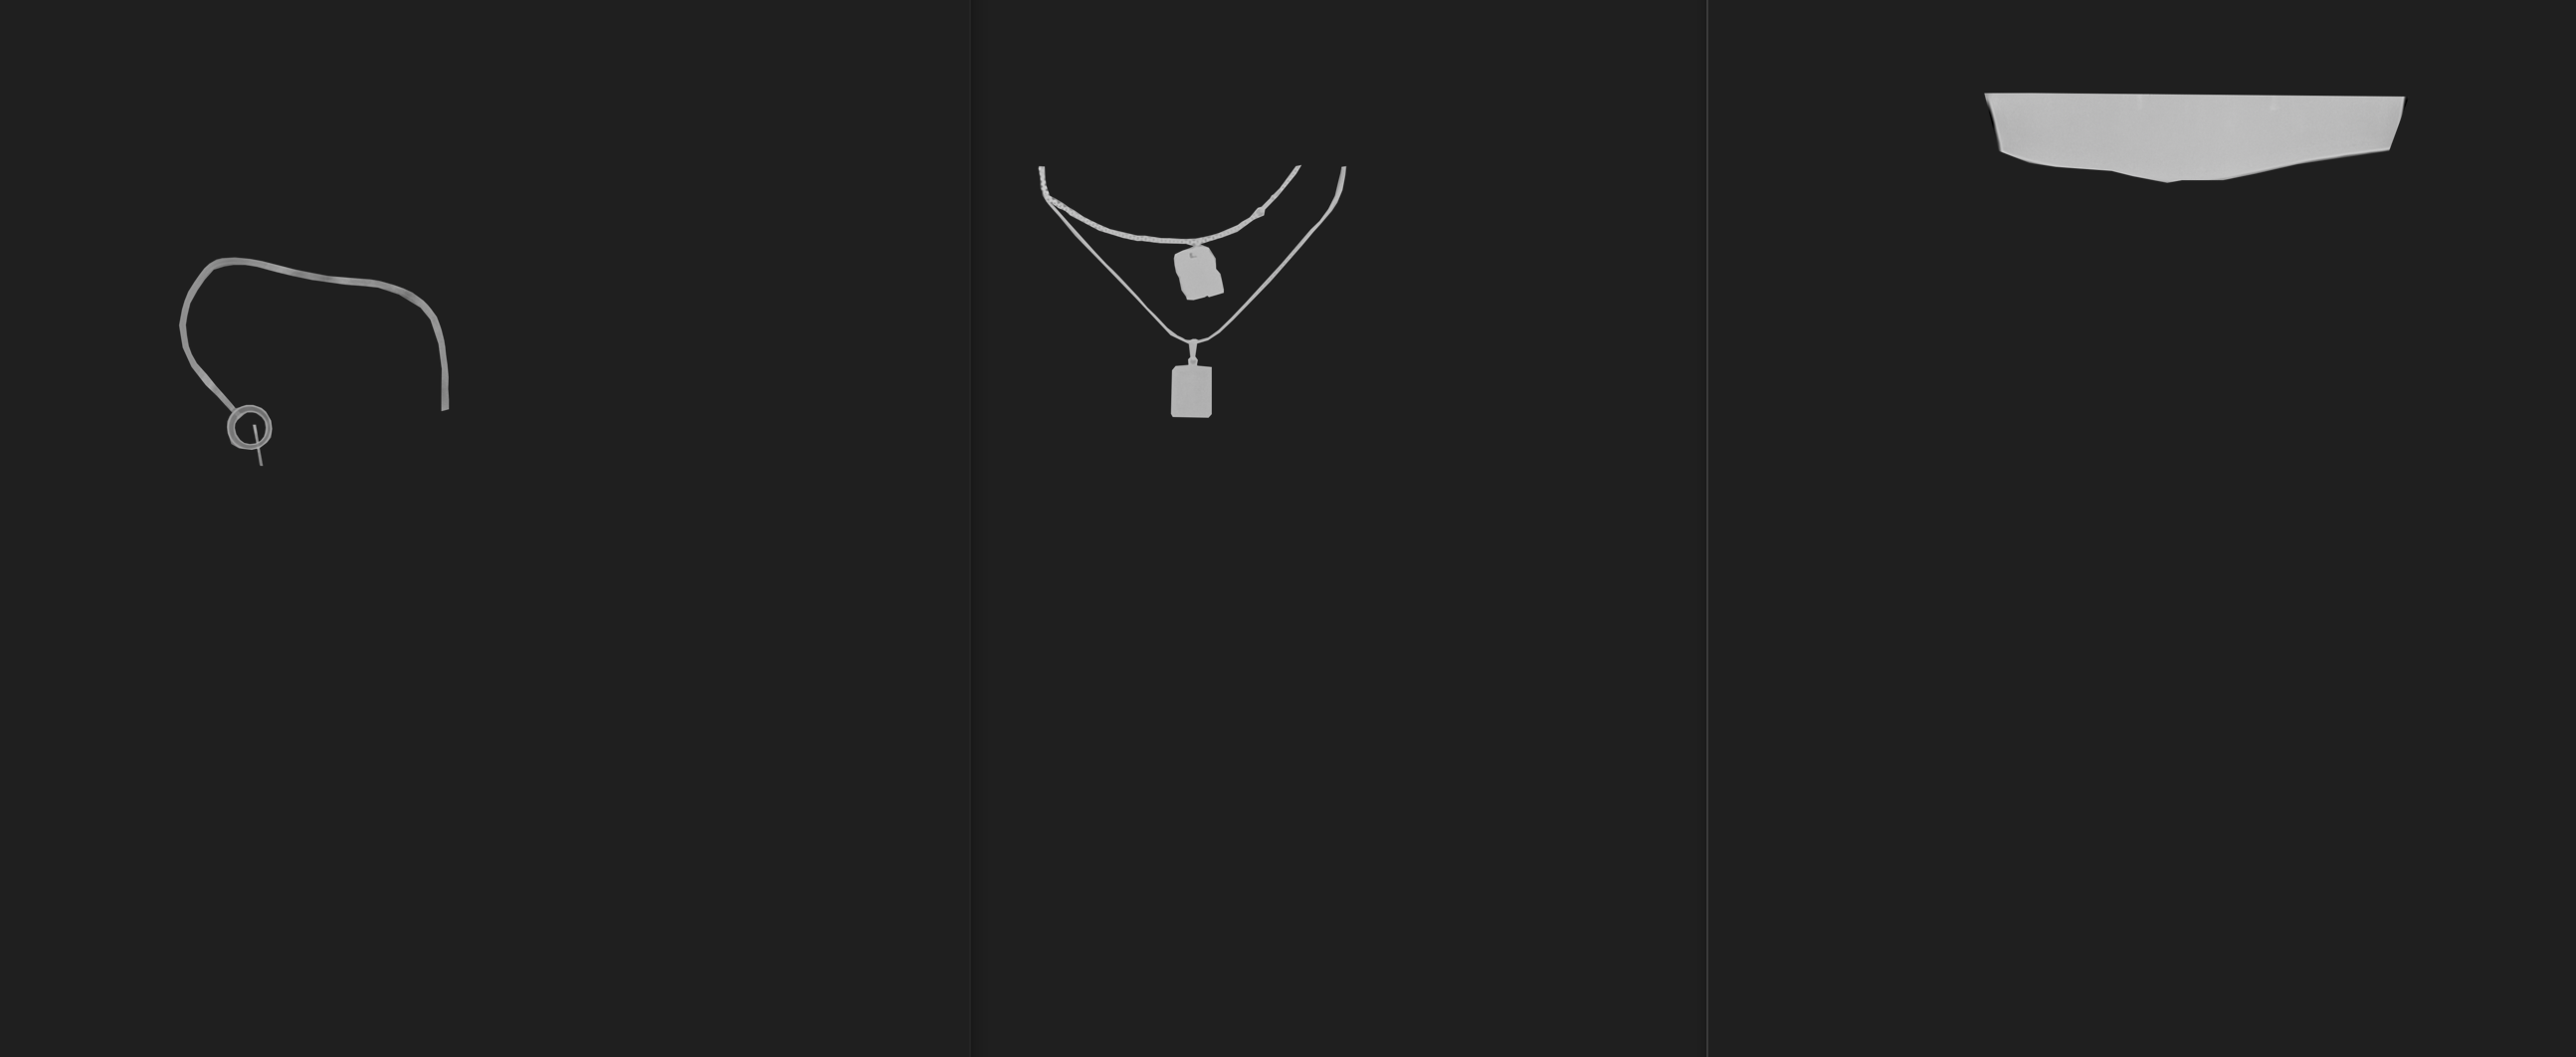

In [ ]:
def addTransparency(img, factor):
    img = img.convert('RGBA')
    img = img.resize((512,512))
    img_blender = Image.new('RGBA', img.size, (0, 0, 0, 0))
    img = Image.blend(img, img_blender, factor)
    img_temp = img
    return img_temp

def artifacts(file_pathname,labels,art_class,transparent_factor=0.5):
    
    mask_1 = Image.open('artifacts'+'/'+art_class+'/1.png')
    mask_2 = Image.open('artifacts'+'/'+art_class+'/2.png')
    mask_3 = Image.open('artifacts'+'/'+art_class+'/3.png')
    mask_4 = Image.open('artifacts'+'/'+art_class+'/4.png')
    mask_5 = Image.open('artifacts'+'/'+art_class+'/5.png')
    #mask_resize = cv2.resize(mask, (512, 512))
    
    for classes in ["Normal","Tuberculosis"]:
        #new_path = file_pathname+"_"+labels+'_weight'+str(weight)+'/'+classes
        new_path = labels+'_'+art_class+'_transparent_factor'+str(transparent_factor)+'/'+classes
        folder = os.path.exists(new_path)
        if not folder:
            os.makedirs(new_path)
        for filename in os.listdir(file_pathname+'/'+classes):
            #print(filename)
            
            n = random.randint(1,5)
            if n == 1:
                mask = mask_1
            if n == 2:
                mask = mask_2
            if n == 3:
                mask = mask_3
            if n == 4:
                mask = mask_4
            if n == 5:
                mask = mask_5
                
            orig_img = Image.open(file_pathname+'/'+classes+'/'+filename)
            addjusted_mask = addTransparency(mask,transparent_factor)
            orig_img.paste(addjusted_mask, (0,0), addjusted_mask)
            #####save figure
            #orig_img.show()
            orig_img.save(new_path+"/"+filename)           

for art_class in ["chest","jew","neck"]:
    print(art_class)
    artifacts("./TB_Chest_Radiography_Database","cv2_artifacts",art_class,transparent_factor=0.1)

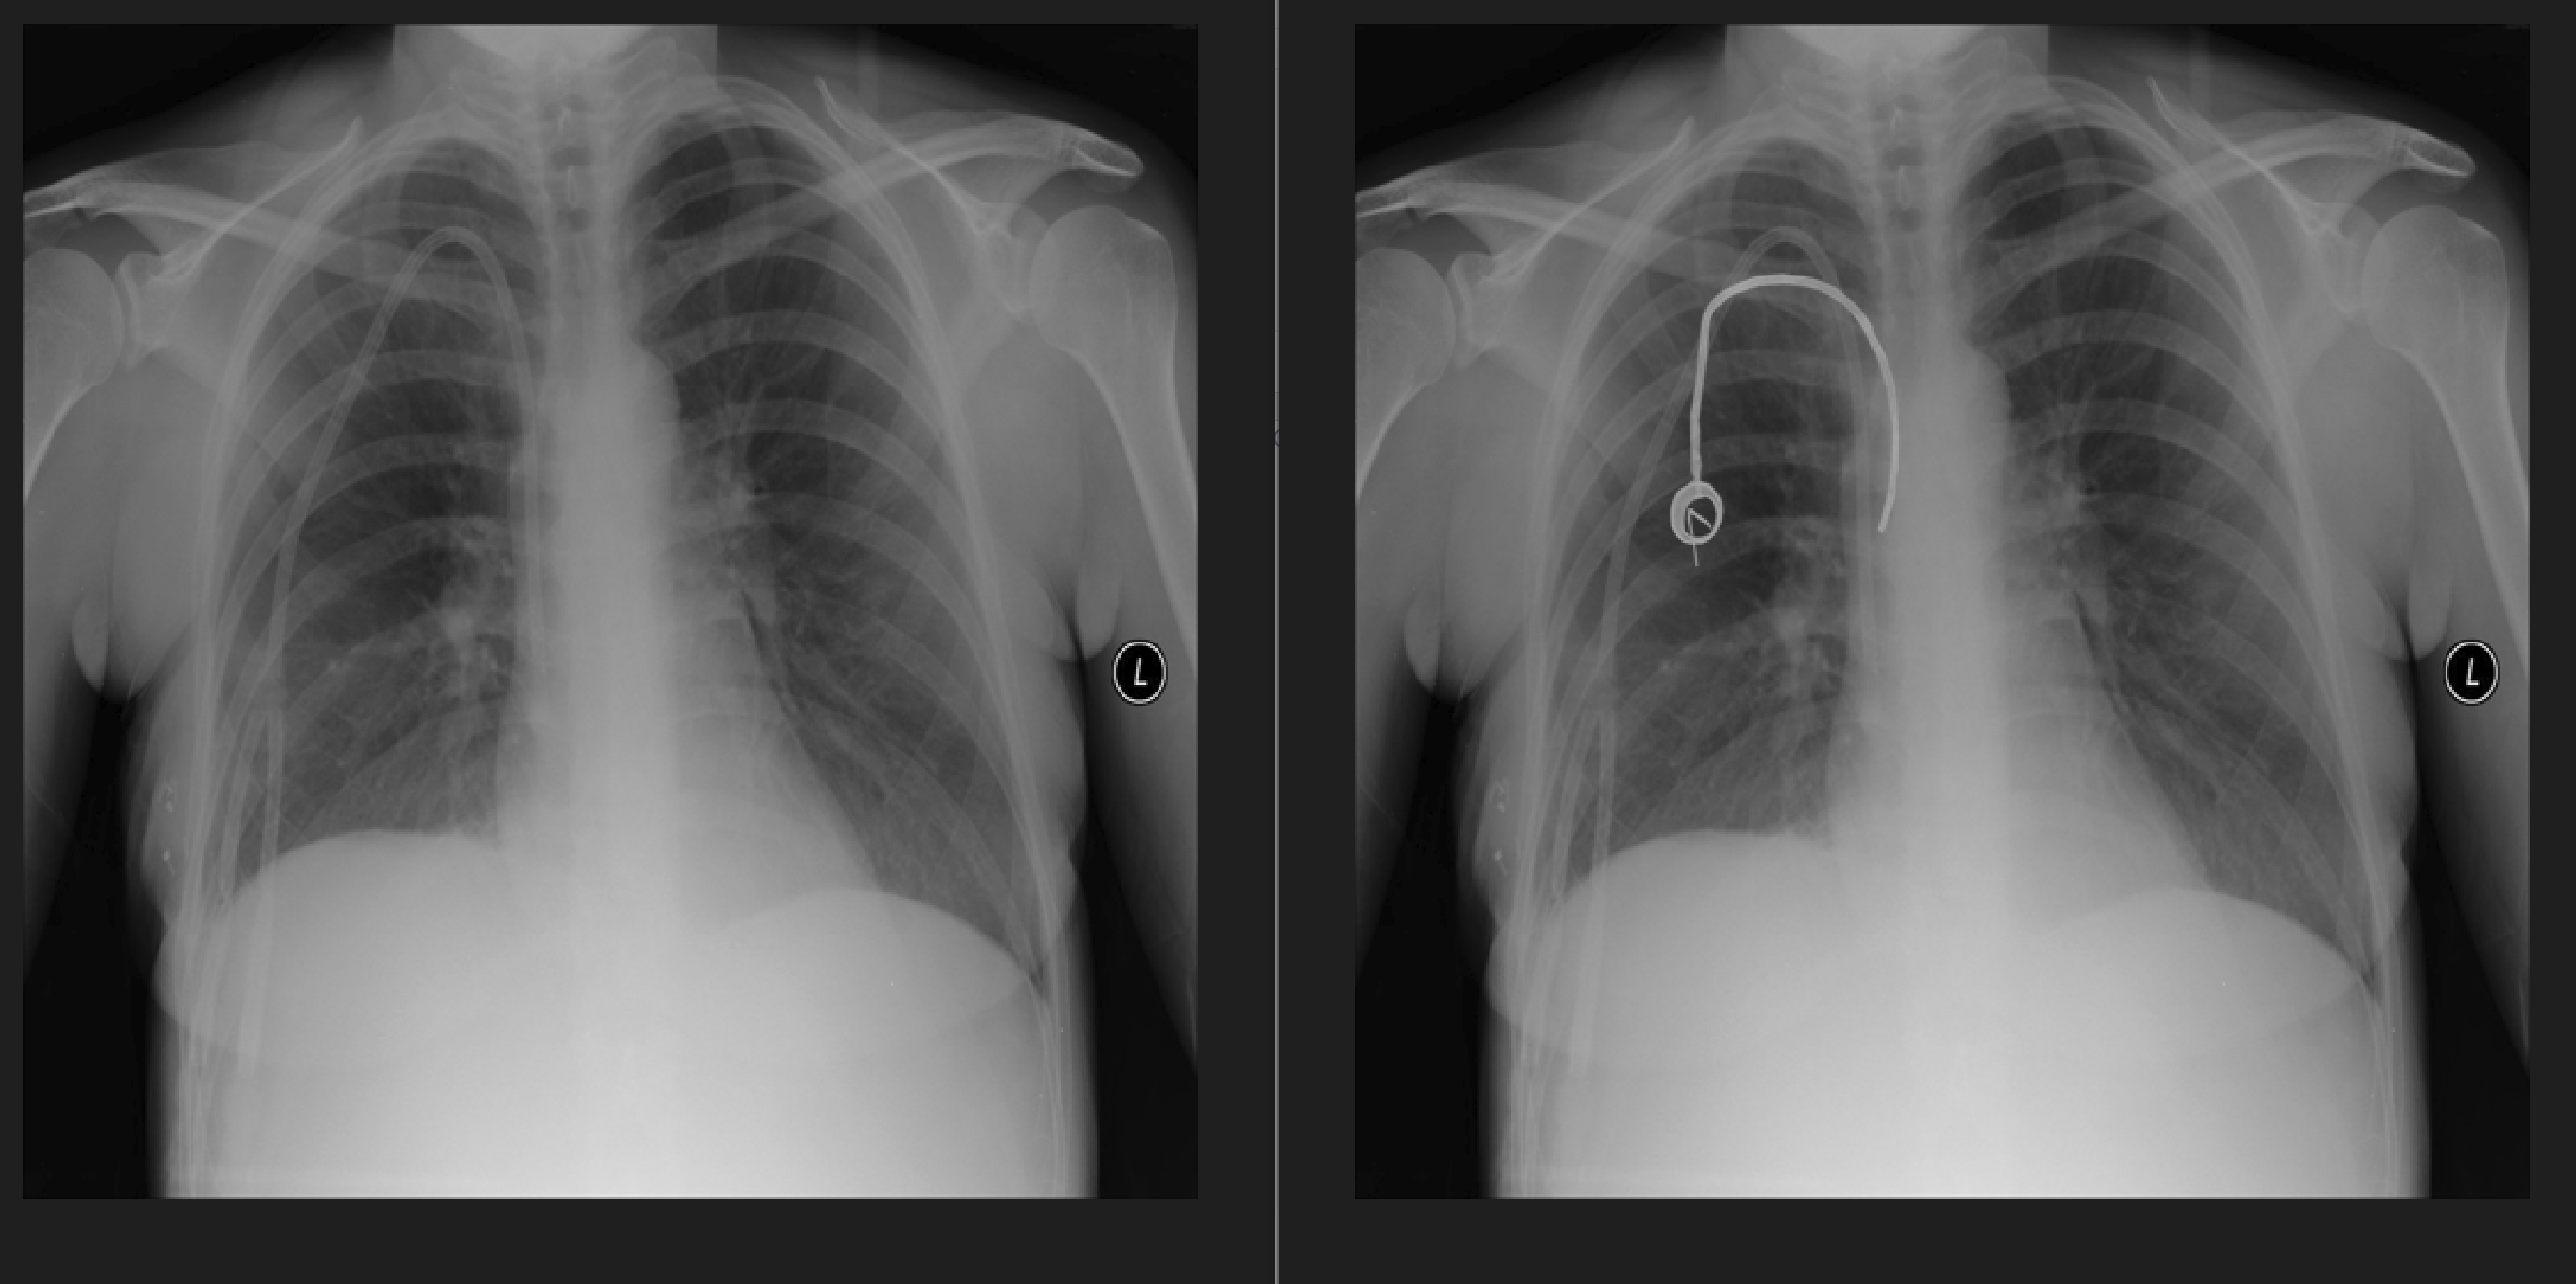